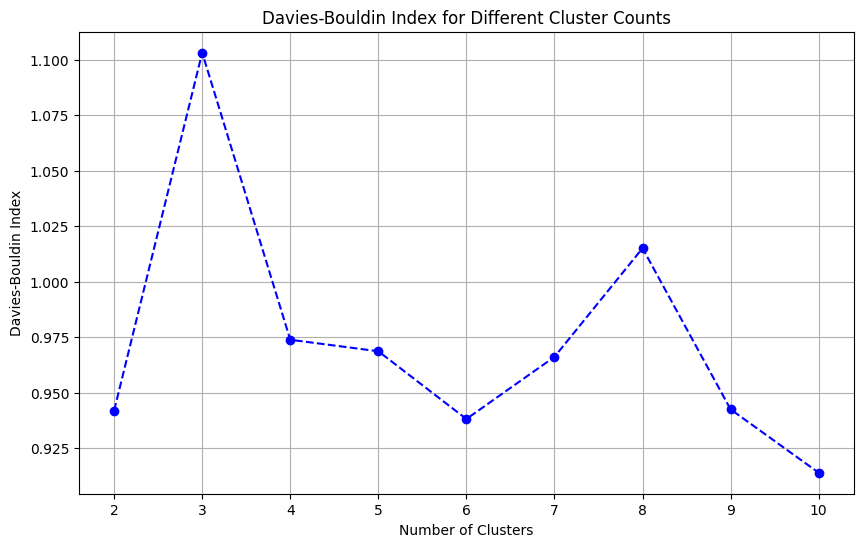

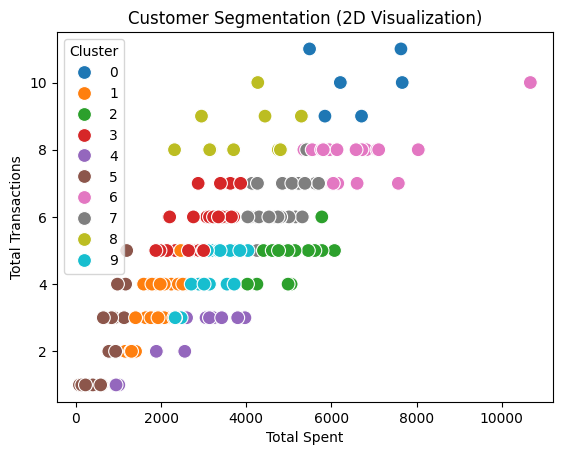

Optimal Number of Clusters: 10
Davies-Bouldin Index: 0.91


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID")

# Feature engineering: Create customer-level features
customer_features = merged_data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    avg_spent_per_transaction=("TotalValue", "mean"),
    total_transactions=("TransactionID", "nunique"),
    total_quantity=("Quantity", "sum")
).reset_index()

# Scale the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])  # Exclude CustomerID

# Determine the optimal number of clusters using the Davies-Bouldin Index
db_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_index)

# Plot DB Index vs Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o', linestyle='--', color='b')
plt.title('Davies-Bouldin Index for Different Cluster Counts')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Select the optimal number of clusters (e.g., lowest DB Index)
optimal_clusters = cluster_range[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters (2D plot using two principal features)
sns.scatterplot(
    x=customer_features['total_spent'],
    y=customer_features['total_transactions'],
    hue=customer_features['Cluster'],
    palette='tab10',
    s=100
)
plt.title('Customer Segmentation (2D Visualization)')
plt.xlabel('Total Spent')
plt.ylabel('Total Transactions')
plt.legend(title='Cluster')
plt.show()

# Save results
customer_features.to_csv("Harshad_Jaiswal_Clustering.csv", index=False)

# Output clustering metrics
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {min(db_scores):.2f}")
